In [1]:
%load_ext autoreload
%autoreload 2
%pip install autoray
%pip install opt_einsum

%pip install --no-deps -U git+https://github.com/jcmgray/quimb.git@08ab4805df6be023e1027503b8c0915e1bf50b34
%pip install -U git+https://github.com/jcmgray/cotengra.git
%pip install kahypar

# just set up some misc notebook plotting stuff

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

import sys; sys.path.append('..')
import matplotlib.pyplot as plt
import quimb.tensor as qtn
import cotengra as ctg
import quimb as qu
import numpy as np
import time, random

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jcmgray/quimb.git (to revision 08ab4805df6be023e1027503b8c0915e1bf50b34) to /tmp/pip-req-build-3wyn1287
  Running command git clone --filter=blob:none --quiet https://github.com/jcmgray/quimb.git /tmp/pip-req-build-3wyn1287
  Running command git rev-parse -q --verify 'sha^08ab4805df6be023e1027503b8c0915e1bf50b34'
  Running command git fetch -q https://github.com/jcmgray/quimb.git 08ab4805df6be023e1027503b8c0915e1bf50b34
  Running command git checkout -q 08ab4805df6be023e1027503b8c0915e1bf50b34
  Resolved https://github.com/jcmgray/quimb.git to commit 08ab4805df6be023e1027503b8c0915e1bf50b34
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jcmgray/cotengra.git to /tmp/pip-req-build-exbr6fkn
  Running command git clone --filter=blob:none --quie

In [2]:
import pyzx as zx
import importlib
importlib.reload(zx)

<module 'pyzx' from '/home/snehal/pyzx/pyzx/__init__.py'>

In [2]:
zx.settings.drawing_backend = 'matplotlib'
%matplotlib inline 
def show(g):
  return zx.draw_matplotlib(g,labels=True,h_edge_draw='box', figsize=(10,10))

In [21]:
def check_similarity(file):
  circ2 = qtn.Circuit.from_qasm_file(file, gate_opts={})
  psi_f = qtn.MPS_computational_state('0' * (circ2.N))
  tn2 = circ2.psi  & psi_f
  output_inds = []
  out2 = tn2.contract()

  circ1 = zx.Circuit.from_qsim_file(file)
  g1 = circ1.to_graph(zh=True)
  qubits = circ2.N
  g1.apply_effect("0"*qubits)
  g1.apply_state("0"*qubits)
  out1 = g1.to_tensor()

  if abs(abs(out1) - abs(out2)) > 1e-9:
    print("Different!")
  else:
    print("Same!")

  print(f"ZX tensor is {out1} with abs value {abs(out1)}")
  print("qt tensor is {} with abs value {}".format(out2, abs(out2)))
  print("Diff ZX-quimb {}".format(abs(out1)-abs(out2)))
  print("Ratio ZX/quimb {}".format(abs(out1)/abs(out2)))


  return out1, out2, g1




In [ ]:
_,_,g1 = check_similarity('a.qsim')

In [19]:
circ1 = zx.Circuit.from_qsim_file('d.qsim')
g1 = circ1.to_graph(zh=True)
#g1.apply_state("0"*21)
#g1.apply_effect("0"*21)
tn1 = g1.to_matrix()
tn1 *= np.exp(-1j * 1.23123)
tn1.round(3)

array([[ 1.   -0.j   ,  0.   +0.j   , -0.   +0.j   , -0.   +0.j   ],
       [-0.   +0.j   ,  0.333-0.j   , -0.   -0.943j,  0.   +0.j   ],
       [ 0.   -0.j   , -0.   -0.943j,  0.333-0.j   ,  0.   +0.j   ],
       [-0.   +0.j   ,  0.   -0.j   ,  0.   +0.j   ,  0.333-0.943j]])

In [12]:
np.exp(-1j * 1.23123)

(0.33307821335633747-0.9428992012868344j)

In [36]:
file = 'b.qsim'
circ2 = qtn.Circuit.from_qasm_file(file, gate_opts={}, Ppsi0)
tn2 = circ2.psi 
abs(tn2.contract())

2.128630424159653e-06

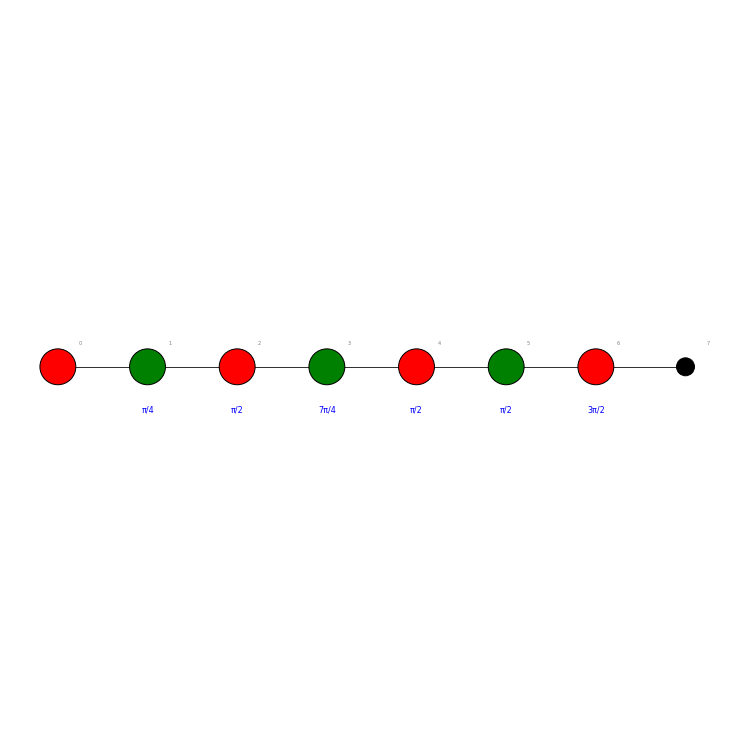

In [211]:
show(g1)

In [190]:
tn1

array([-0.35355339+0.85355339j,  0.35355339+0.14644661j])

In [103]:
tn2 * zx.find_scalar_correction(tn1, tn2)

array([ 0.5       +0.5j       , -0.10133574+0.69980788j])

In [104]:
abs(zx.find_scalar_correction(tn1, tn2))

1.0000000000000002